# 1. Random Forest Importance

Top 5 features affecting 'condition':
ST_Slope
MaxHR
Oldpeak
ChestPainType
Cholesterol


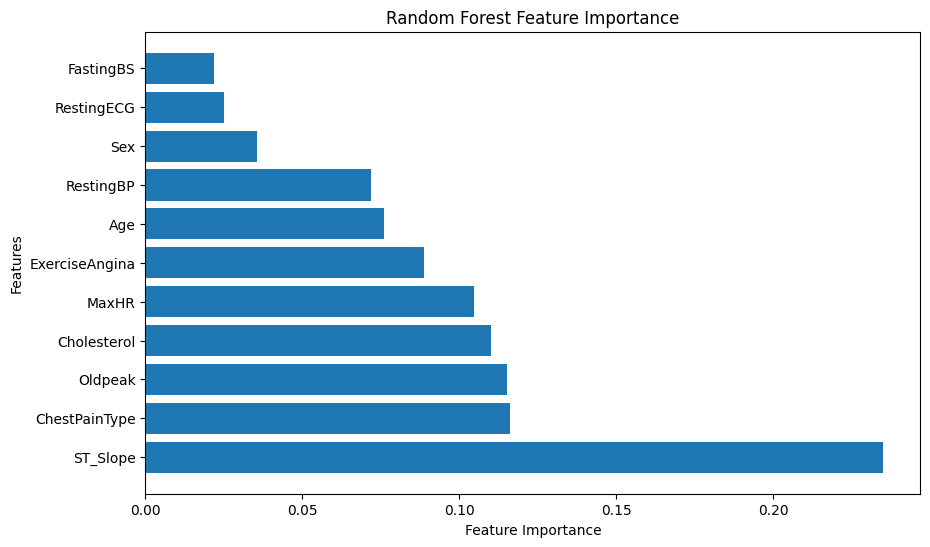

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('./dataset/heart.csv')


label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_


feature_names = X.columns
sorted_indices = np.argsort(feature_importances)


top_5_features = set(feature_names[sorted_indices[-5:]])


weight = {feature: 0 for feature in feature_names}


for feature in top_5_features:
    weight[feature] += 1


print("Top 5 features affecting 'condition':")
for feature in top_5_features:
    print(feature)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  
plt.show()


In [2]:
weight

{'Age': 0,
 'Sex': 0,
 'ChestPainType': 1,
 'RestingBP': 0,
 'Cholesterol': 1,
 'FastingBS': 0,
 'RestingECG': 0,
 'MaxHR': 1,
 'ExerciseAngina': 0,
 'Oldpeak': 1,
 'ST_Slope': 1}

## 2. PCA

Top 5 features affecting 'condition' based on PCA:
Age
MaxHR
RestingBP
ChestPainType
Cholesterol


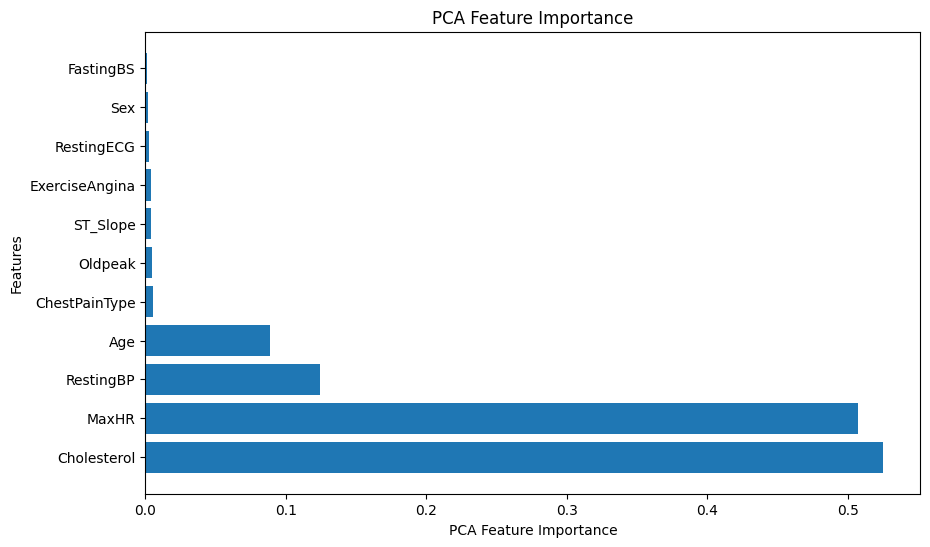

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder



pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


pca_importance = np.abs(pca.components_).mean(axis=0)


feature_names = X.columns
sorted_indices = np.argsort(pca_importance)


top_5_features = set(feature_names[sorted_indices[-5:]])


for feature in top_5_features:
    weight[feature] += 1


print("Top 5 features affecting 'condition' based on PCA:")
for feature in top_5_features:
    print(feature)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), pca_importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('PCA Feature Importance')
plt.ylabel('Features')
plt.title('PCA Feature Importance')
plt.gca().invert_yaxis()  
plt.show()


In [4]:
weight

{'Age': 1,
 'Sex': 0,
 'ChestPainType': 2,
 'RestingBP': 1,
 'Cholesterol': 2,
 'FastingBS': 0,
 'RestingECG': 0,
 'MaxHR': 2,
 'ExerciseAngina': 0,
 'Oldpeak': 1,
 'ST_Slope': 1}

# 3. Genetic Algorithm

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from genetic_selection import GeneticSelectionCV
from sklearn.preprocessing import LabelEncoder




def evaluate_subset(subset):
    X_subset = X.iloc[:, subset]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)


selector = GeneticSelectionCV(RandomForestClassifier(n_estimators=100, random_state=42),
                              cv=5,
                              verbose=1,
                              scoring="accuracy",
                              n_population=50,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=40,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=3,
                              n_gen_no_change=10,
                              caching=True,
                              n_jobs=-1)
selector = selector.fit(X, y)


selected_features = selector.support_




top_5_features = sorted(weight, key=weight.get, reverse=True)[:5]




for feature in top_5_features:
    weight[feature] += 1

print("Top 5 features affecting 'condition' based on Genetic Algorithm:")
for feature in top_5_features:
    print(feature)


Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	50    	[ 0.758113  6.14      0.043388]	[ 0.075461  3.452593  0.018612]	[ 0.534895  1.        0.001193]	[  0.833268  11.         0.114729]
1  	33    	[ 0.816237  8.38      0.046185]	[ 0.017679  1.864296  0.008129]	[ 0.755957  3.        0.029823]	[  0.835424  11.         0.066538]
2  	21    	[ 0.825869  9.06      0.045653]	[ 0.008404  1.317725  0.006726]	[ 0.794007  7.        0.037219]	[  0.841958  11.         0.057013]
3  	26    	[ 0.82933   8.3       0.048915]	[ 0.011211  1.024695  0.006184]	[ 0.769054  5.        0.038627]	[  0.841958  11.         0.057013]
4  	34    	[ 0.833917  8.26      0.051577]	[ 0.004554  0.769675  0.004589]	[ 0.814718  7.        0.038955]	[  0.841958  10.         0.056881]
5  	27    	[ 0.836969  8.04      0.051401]	[ 0.004434  0.445421  0.00436 ]	[ 0.817979  7.        0.045346

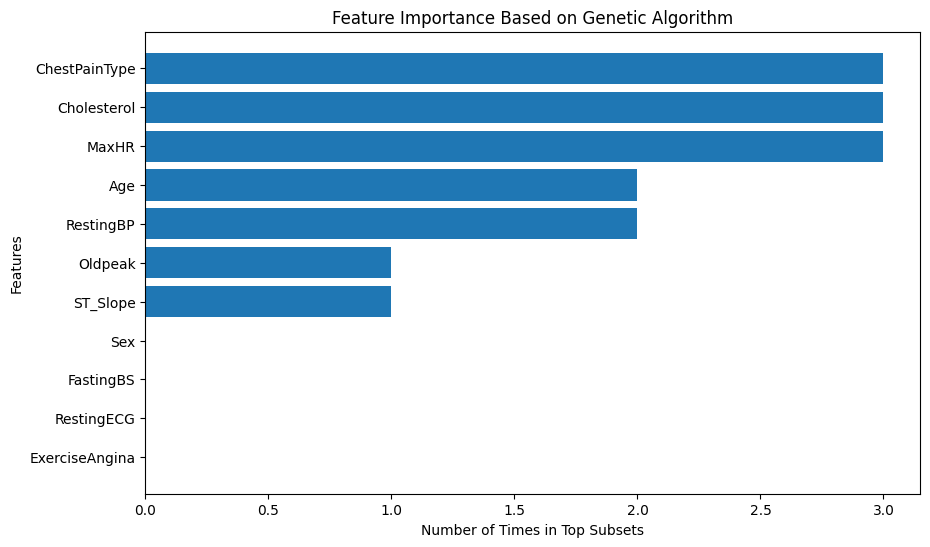

In [6]:
import matplotlib.pyplot as plt


sorted_weights = sorted(weight.items(), key=lambda x: x[1], reverse=True)
features, counts = zip(*sorted_weights)

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), counts, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Number of Times in Top Subsets')
plt.ylabel('Features')
plt.title('Feature Importance Based on Genetic Algorithm')
plt.gca().invert_yaxis()  
plt.show()


In [7]:
weight

{'Age': 2,
 'Sex': 0,
 'ChestPainType': 3,
 'RestingBP': 2,
 'Cholesterol': 3,
 'FastingBS': 0,
 'RestingECG': 0,
 'MaxHR': 3,
 'ExerciseAngina': 0,
 'Oldpeak': 1,
 'ST_Slope': 1}

# 4. ICA

Top 5 features affecting 'condition' based on ICA:
Age
MaxHR
RestingBP
ChestPainType
Cholesterol


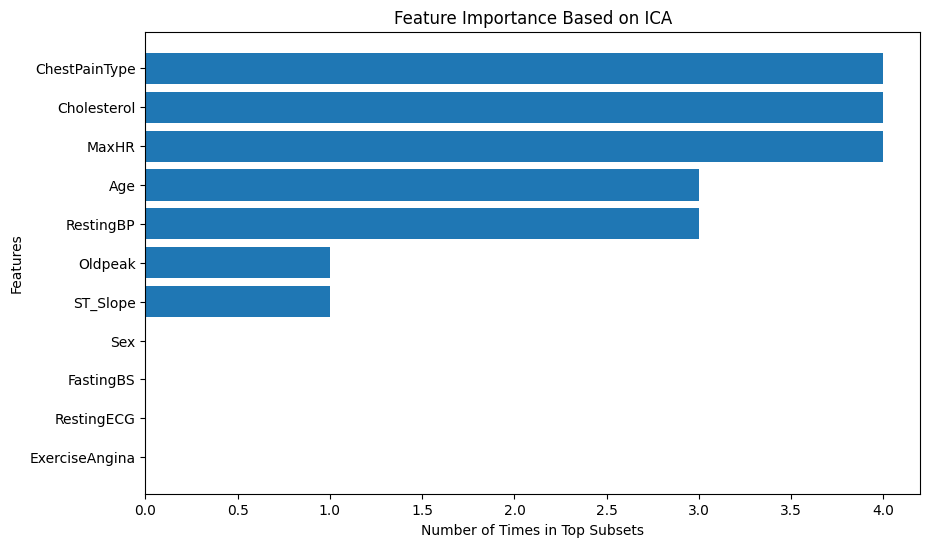

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.preprocessing import LabelEncoder




ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X)


ica_importance = np.abs(ica.components_).mean(axis=0)


feature_names = X.columns
sorted_indices = np.argsort(ica_importance)


top_5_features = set(feature_names[sorted_indices[-5:]])




for feature in top_5_features:
    weight[feature] += 1


print("Top 5 features affecting 'condition' based on ICA:")
for feature in top_5_features:
    print(feature)


sorted_weights = sorted(weight.items(), key=lambda x: x[1], reverse=True)
features, counts = zip(*sorted_weights)

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), counts, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Number of Times in Top Subsets')
plt.ylabel('Features')
plt.title('Feature Importance Based on ICA')
plt.gca().invert_yaxis()  
plt.show()


In [9]:
weight

{'Age': 3,
 'Sex': 0,
 'ChestPainType': 4,
 'RestingBP': 3,
 'Cholesterol': 4,
 'FastingBS': 0,
 'RestingECG': 0,
 'MaxHR': 4,
 'ExerciseAngina': 0,
 'Oldpeak': 1,
 'ST_Slope': 1}

# 5. K means clustering


Top 5 features affecting 'condition' based on K-Means:
ST_Slope
Oldpeak
ExerciseAngina
Cholesterol
FastingBS


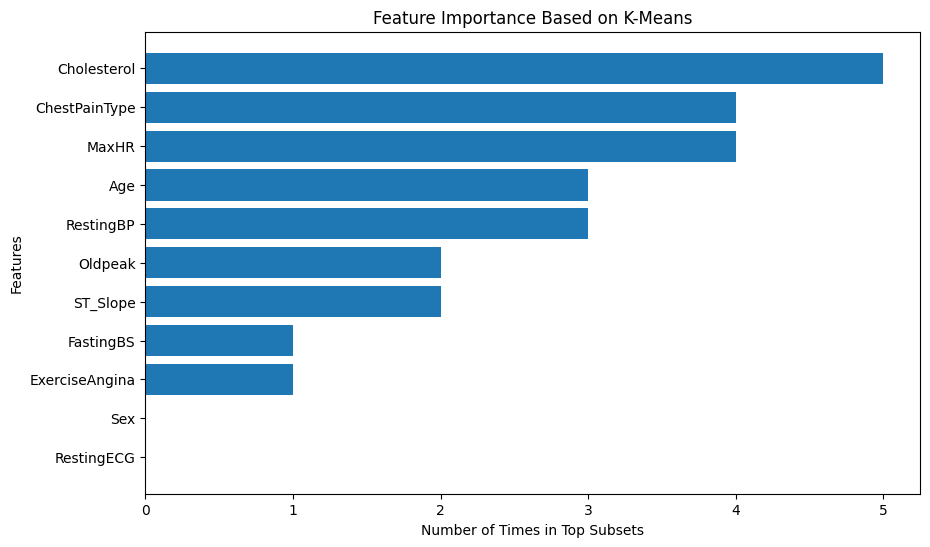

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
cluster_centers = kmeans.cluster_centers_


feature_importance = np.var(cluster_centers, axis=0)


feature_names = X.columns
sorted_indices = np.argsort(feature_importance)


top_5_features = set(feature_names[sorted_indices[-5:]])



for feature in top_5_features:
    weight[feature] += 1


print("Top 5 features affecting 'condition' based on K-Means:")
for feature in top_5_features:
    print(feature)


sorted_weights = sorted(weight.items(), key=lambda x: x[1], reverse=True)
features, counts = zip(*sorted_weights)

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), counts, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Number of Times in Top Subsets')
plt.ylabel('Features')
plt.title('Feature Importance Based on K-Means')
plt.gca().invert_yaxis()  
plt.show()


In [11]:
weight


{'Age': 3,
 'Sex': 0,
 'ChestPainType': 4,
 'RestingBP': 3,
 'Cholesterol': 5,
 'FastingBS': 1,
 'RestingECG': 0,
 'MaxHR': 4,
 'ExerciseAngina': 1,
 'Oldpeak': 2,
 'ST_Slope': 2}

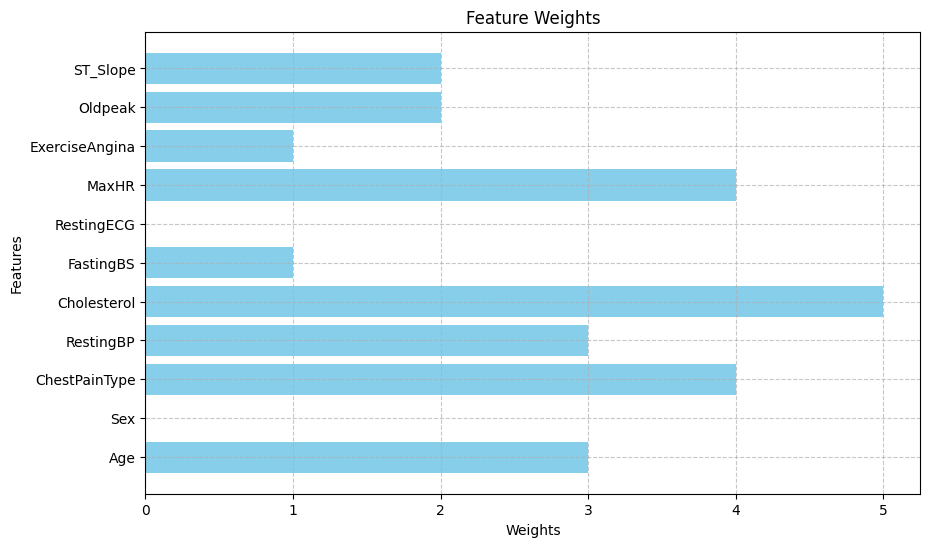

In [12]:
features = list(weight.keys())
weights = list(weight.values())

plt.figure(figsize=(10, 6))
plt.barh(features, weights, color='skyblue')
plt.xlabel('Weights')
plt.ylabel('Features')
plt.title('Feature Weights')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

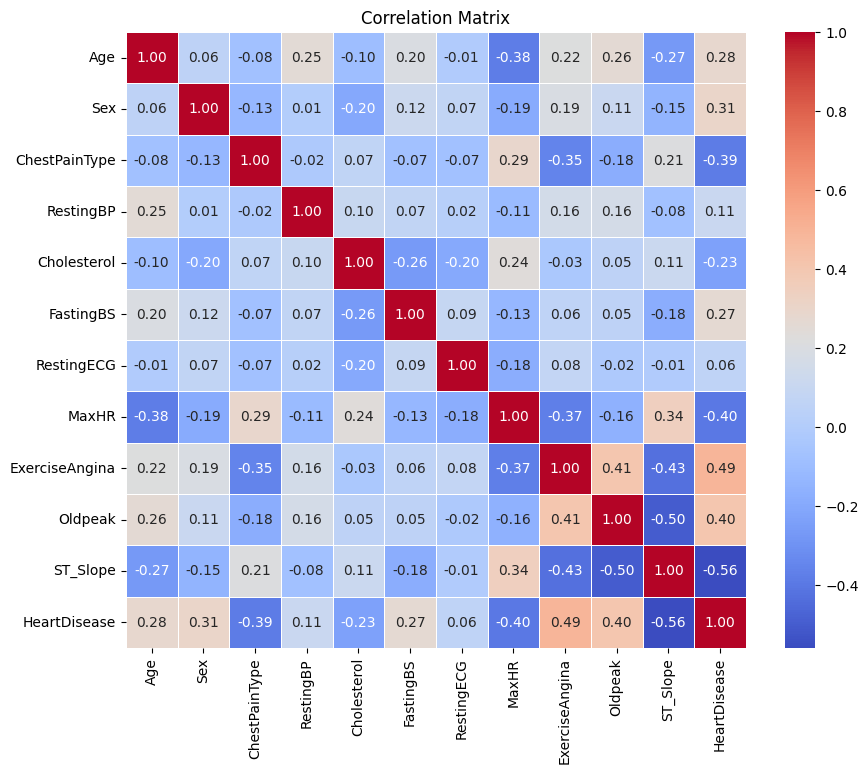

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
